<a href="https://colab.research.google.com/github/Skurmes/Data-Science-Project/blob/main/Copy_of_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ethereum Data Analysis Chart

In [33]:
#Import the libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import dataframe as df

from fbprophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
#Loading the data

from google.colab import files
upload = files.upload()

In [35]:
#Storing the data into Dataframes
df_ETH = pd.read_csv('ETH-USD (1).csv')

In [36]:
#Printing the data
df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-23,242.537018,244.864410,239.759735,244.142151,244.142151,6.624530e+09
1,2020-06-24,244.185928,248.508026,232.807739,235.772461,235.772461,8.815030e+09
2,2020-06-25,235.702850,236.053406,230.296600,232.944489,232.944489,7.010426e+09
3,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09
4,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09
...,...,...,...,...,...,...,...
361,2021-06-19,2235.159180,2278.415039,2168.885010,2178.499023,2178.499023,1.876585e+10
362,2021-06-20,2171.337891,2275.382813,2049.962646,2246.364502,2246.364502,2.253593e+10
363,2021-06-21,2245.317871,2259.464111,1867.185425,1888.447510,1888.447510,3.374517e+10
364,2021-06-22,1886.667603,1993.159790,1707.600586,1874.950073,1874.950073,3.554725e+10


In [37]:
#Statistical labeling
df_ETH.describe()


,Open,High,Low,Close,Adj Close,Volume
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,1204.019287,1256.404665,1144.204369,1208.678389,1208.678389,2.367018e+10
std,970.136810,1019.286400,910.345591,969.682697,969.682697,1.419217e+10
min,222.914490,228.598282,219.472672,222.959793,222.959793,5.109033e+09
25%,386.373398,395.907883,374.979446,386.528228,386.528228,1.242225e+10
50%,638.315186,662.699097,628.334961,642.868958,642.868958,2.024132e+10
75%,1851.146485,1933.616760,1791.458191,1861.306579,1861.306579,3.193287e+10
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


In [38]:

df_ETH.dropna(inplace=True)
df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-23,242.537018,244.864410,239.759735,244.142151,244.142151,6.624530e+09
1,2020-06-24,244.185928,248.508026,232.807739,235.772461,235.772461,8.815030e+09
2,2020-06-25,235.702850,236.053406,230.296600,232.944489,232.944489,7.010426e+09
3,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09
4,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09
...,...,...,...,...,...,...,...
361,2021-06-19,2235.159180,2278.415039,2168.885010,2178.499023,2178.499023,1.876585e+10
362,2021-06-20,2171.337891,2275.382813,2049.962646,2246.364502,2246.364502,2.253593e+10
363,2021-06-21,2245.317871,2259.464111,1867.185425,1888.447510,1888.447510,3.374517e+10
364,2021-06-22,1886.667603,1993.159790,1707.600586,1874.950073,1874.950073,3.554725e+10


In [39]:
#Now including the Prediction Column
projection = 15

df_ETH['Prediction'] = df_ETH[['Close']].shift(-projection)

df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2020-06-23,242.537018,244.864410,239.759735,244.142151,244.142151,6.624530e+09,246.670013
1,2020-06-24,244.185928,248.508026,232.807739,235.772461,235.772461,8.815030e+09,243.015961
2,2020-06-25,235.702850,236.053406,230.296600,232.944489,232.944489,7.010426e+09,240.984985
3,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09,239.458176
4,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09,242.131699
...,...,...,...,...,...,...,...,...
361,2021-06-19,2235.159180,2278.415039,2168.885010,2178.499023,2178.499023,1.876585e+10,NaN
362,2021-06-20,2171.337891,2275.382813,2049.962646,2246.364502,2246.364502,2.253593e+10,NaN
363,2021-06-21,2245.317871,2259.464111,1867.185425,1888.447510,1888.447510,3.374517e+10,NaN
364,2021-06-22,1886.667603,1993.159790,1707.600586,1874.950073,1874.950073,3.554725e+10,NaN


In [ ]:

X = np.array(df_ETH[['Close']])

X = X[:-projection]
print(X)

In [ ]:

y = df_ETH['Prediction'].values
y = y[:-projection]
      
print(y)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .15)

In [43]:

linReg = LinearRegression()
linReg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:

linReg_confidence = linReg.score(x_test, y_test)
print('Liner Regression Confidence: ', linReg_confidence)


Liner Regression Confidence:  0.8247883511885354


In [45]:
x_projection = np.array(df_ETH[['Close']])[-projection:]
print(x_projection)

[[2608.26709 ]
 [2471.518555]
 [2353.768799]
 [2372.484375]
 [2508.391602]
 [2537.891113]
 [2610.936768]
 [2367.663574]
 [2372.001953]
 [2231.733154]
 [2178.499023]
 [2246.364502]
 [1888.44751 ]
 [1874.950073]
 [2000.787476]]


In [46]:
#Prediction of Data results within 15% split
linReg_prediction = linReg.predict(x_projection)
print(linReg_prediction)

[2589.80713192 2463.34112913 2354.44533021 2371.75362596 2497.44158121
 2524.72293557 2592.27606883 2367.29531543 2371.30747871 2241.58591112
 2192.35461399 2255.11708421 1924.1129436  1911.63041934 2028.00573085]


In [47]:
#Data for Crypocurrency Graph

end = dt.datetime.now()
start = dt.date(end.year - 4, end.month, end.day)

tickers = ['BTC-USD', 'ETH-USD', 'DOGE-USD']
end

datetime.datetime(2021, 7, 7, 16, 8, 0, 114046)

In [48]:
yf.download(tickers, start, end)

[*********************100%***********************]  3 of 3 completed


Adj Close            ...      Volume             
                 BTC-USD  DOGE-USD  ...    DOGE-USD      ETH-USD
Date                                ...                         
2017-07-07   2518.659912  0.002397  ...     7367710    687251968
2017-07-08   2571.340088  0.002440  ...     8176760    754958016
2017-07-09   2518.439941  0.002330  ...     4122620    505118016
2017-07-10   2372.560059  0.001952  ...     7350820    937219008
2017-07-11   2337.790039  0.001779  ...     9803180   1440950016
...                  ...       ...  ...         ...          ...
2021-07-03  34668.546875  0.246411  ...   917015819  17433361641
2021-07-04  35287.781250  0.246483  ...   973511519  18787107473
2021-07-05  33746.003906  0.231614  ...  1267949362  20103794829
2021-07-06  34235.195312  0.234422  ...  1265920169  20891861314
2021-07-07  34485.402344  0.230766  ...  1025997056  23529736192

[1458 rows x 18 columns]

In [49]:
#Seperating Ethereum Data for graphical analysis
df_ETH = yf.download('ETH-USD', start)
df_ETH

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-07,270.350006,273.942993,244.173996,245.990997,245.990997,687251968
2017-07-08,245.889999,273.476990,236.550995,251.697006,251.697006,754958016
2017-07-09,251.822006,255.104996,242.136993,242.136993,242.136993,505118016
2017-07-10,243.011002,243.070999,196.964996,215.356995,215.356995,937219008
2017-07-11,211.524994,220.291000,183.391998,197.404007,197.404007,1440950016
...,...,...,...,...,...,...
2021-07-03,2150.834961,2237.567139,2117.590088,2226.114258,2226.114258,17433361641
2021-07-04,2226.550293,2384.286865,2190.837646,2321.724121,2321.724121,18787107473
2021-07-05,2321.922852,2321.922852,2163.041504,2198.582520,2198.582520,20103794829


In [50]:
#Ajusting Date column to prevent errors
df_ETH = df_ETH.reset_index()
df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-07,270.350006,273.942993,244.173996,245.990997,245.990997,687251968
1,2017-07-08,245.889999,273.476990,236.550995,251.697006,251.697006,754958016
2,2017-07-09,251.822006,255.104996,242.136993,242.136993,242.136993,505118016
3,2017-07-10,243.011002,243.070999,196.964996,215.356995,215.356995,937219008
4,2017-07-11,211.524994,220.291000,183.391998,197.404007,197.404007,1440950016
...,...,...,...,...,...,...,...
1453,2021-07-03,2150.834961,2237.567139,2117.590088,2226.114258,2226.114258,17433361641
1454,2021-07-04,2226.550293,2384.286865,2190.837646,2321.724121,2321.724121,18787107473
1455,2021-07-05,2321.922852,2321.922852,2163.041504,2198.582520,2198.582520,20103794829
1456,2021-07-06,2197.919434,2346.294922,2197.919434,2324.679443,2324.679443,20891861314


In [51]:
#Labeling Column for Graph interpretation
df_ETH[['ds', 'y']] = df_ETH[['Date', 'Adj Close']]
df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2017-07-07,270.350006,273.942993,244.173996,245.990997,245.990997,687251968,2017-07-07,245.990997
1,2017-07-08,245.889999,273.476990,236.550995,251.697006,251.697006,754958016,2017-07-08,251.697006
2,2017-07-09,251.822006,255.104996,242.136993,242.136993,242.136993,505118016,2017-07-09,242.136993
3,2017-07-10,243.011002,243.070999,196.964996,215.356995,215.356995,937219008,2017-07-10,215.356995
4,2017-07-11,211.524994,220.291000,183.391998,197.404007,197.404007,1440950016,2017-07-11,197.404007
...,...,...,...,...,...,...,...,...,...
1453,2021-07-03,2150.834961,2237.567139,2117.590088,2226.114258,2226.114258,17433361641,2021-07-03,2226.114258
1454,2021-07-04,2226.550293,2384.286865,2190.837646,2321.724121,2321.724121,18787107473,2021-07-04,2321.724121
1455,2021-07-05,2321.922852,2321.922852,2163.041504,2198.582520,2198.582520,20103794829,2021-07-05,2198.582520
1456,2021-07-06,2197.919434,2346.294922,2197.919434,2324.679443,2324.679443,20891861314,2021-07-06,2324.679443


In [52]:
model = Prophet()

model.fit(df_ETH)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future = model.make_future_dataframe(60)

In [54]:
#Data for Graph pulled from Prediction
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-07,56.412685,-197.073312,261.387128,56.412685,56.412685,-27.567979,-27.567979,-27.567979,-2.681479,-2.681479,-2.681479,-24.886500,-24.886500,-24.886500,0.0,0.0,0.0,28.844706
1,2017-07-08,60.807887,-193.251438,270.489478,60.807887,60.807887,-16.137486,-16.137486,-16.137486,-1.566480,-1.566480,-1.566480,-14.571007,-14.571007,-14.571007,0.0,0.0,0.0,44.670401
2,2017-07-09,65.203089,-155.277157,274.062712,65.203089,65.203089,-4.187450,-4.187450,-4.187450,-0.418875,-0.418875,-0.418875,-3.768575,-3.768575,-3.768575,0.0,0.0,0.0,61.015639
3,2017-07-10,69.598291,-155.140278,304.564943,69.598291,69.598291,9.043188,9.043188,9.043188,1.710547,1.710547,1.710547,7.332641,7.332641,7.332641,0.0,0.0,0.0,78.641479
4,2017-07-11,73.993493,-132.974549,311.157177,73.993493,73.993493,22.552382,22.552382,22.552382,4.013766,4.013766,4.013766,18.538616,18.538616,18.538616,0.0,0.0,0.0,96.545875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2021-09-01,3236.014418,3029.531391,3483.929385,3204.939633,3268.511663,23.296189,23.296189,23.296189,-0.093585,-0.093585,-0.093585,23.389775,23.389775,23.389775,0.0,0.0,0.0,3259.310607
1514,2021-09-02,3244.452378,3032.053569,3500.008715,3212.004838,3277.364473,16.892237,16.892237,16.892237,-0.963894,-0.963894,-0.963894,17.856131,17.856131,17.856131,0.0,0.0,0.0,3261.344615
1515,2021-09-03,3252.890338,3020.632924,3497.765804,3219.122820,3286.891198,9.328694,9.328694,9.328694,-2.681479,-2.681479,-2.681479,12.010173,12.010173,12.010173,0.0,0.0,0.0,3262.219032
1516,2021-09-04,3261.328298,3028.131416,3500.219647,3226.683295,3296.435426,4.380204,4.380204,4.380204,-1.566480,-1.566480,-1.566480,5.946683,5.946683,5.946683,0.0,0.0,0.0,3265.708502


<function matplotlib.pyplot.show>

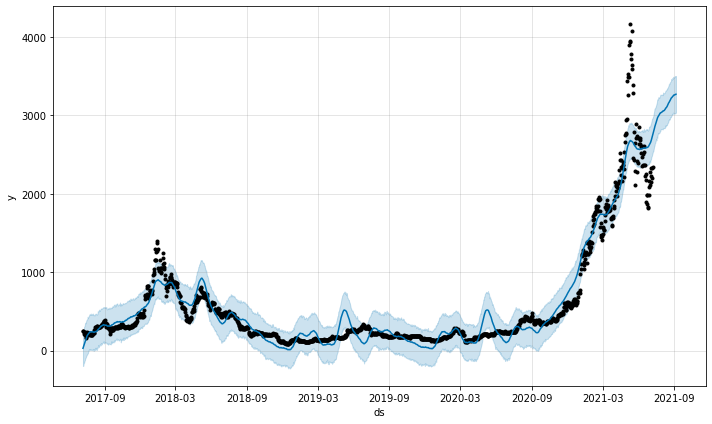

In [55]:
model.plot(forecast)
plt.show

<function matplotlib.pyplot.show>

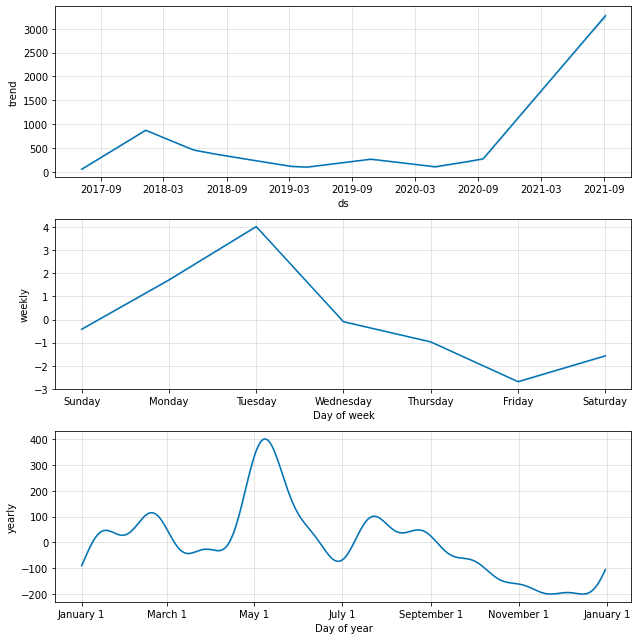

In [56]:
model.plot_components(forecast)
plt.show